<a href="https://colab.research.google.com/github/rafa-fortes/CursoDS_Mentorama/blob/main/Machine_Learning_na_pr%C3%A1tica(contexto_de_regress%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nota Média Final no Ensino Médio: Machine Learning

### Checklist



1.   Definição do Problema
2.   Obtenção dos Dados
3.   Análise exploratória dos dados
4.   Preparação dos Dados
5.   Construção do Modelo e Avaliação













# 1. Definição do Proplema:
Considere a variável 'G3' como a variável target do problema - contexto de regressão.

<br>

__Objetivo:__

É entender quantas dessas variáveis e quais dessas variáveis como que elas estão relacionadas com essas variável target.

# 2.   Obtenção dos Dados

Os dados disponibilizados pela Mentorama

# Importando as bibliotecas 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando os dados

In [ ]:
df = pd.read_csv("/content/sample_data/dataframe_exercicio_modulo_9.csv")
print(df.shape)
df.head()


(1044, 17)


,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

# 3.   Análise exploratória dos dados

Tipos das variáveis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   traveltime  1044 non-null   int64 
 5   studytime   1044 non-null   int64 
 6   schoolsup   1044 non-null   object
 7   famsup      1044 non-null   object
 8   paid        1044 non-null   object
 9   activities  1044 non-null   object
 10  internet    1044 non-null   object
 11  romantic    1044 non-null   object
 12  famrel      1044 non-null   int64 
 13  freetime    1044 non-null   int64 
 14  goout       1044 non-null   int64 
 15  absences    1044 non-null   int64 
 16  G3          1044 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 138.8+ KB


Como podemos ver acima, que não há missing values. Confirmamos isso no heatmap abaixo

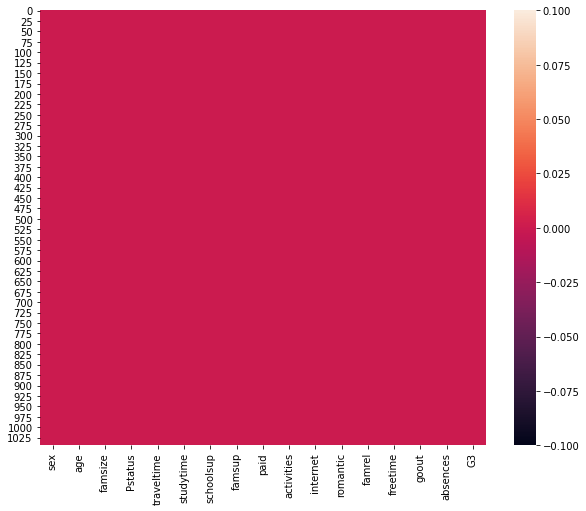

In [ ]:
plt.figure(figsize = [10,8])
sns.heatmap(df.isnull());

Distribuição estatística dos dados

In [ ]:
df.describe()

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,3.935824,3.201149,3.156130,4.434866,11.341954
std,1.239975,0.731727,0.834353,0.933401,1.031507,1.152575,6.210017,3.864796
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,4.000000,3.000000,2.000000,0.000000,10.000000
50%,17.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,11.000000
75%,18.000000,2.000000,2.000000,5.000000,4.000000,4.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,20.000000


# Vamos analisar a correlação das variáveis explicativas com a variável target.

In [ ]:
df.corr()['G3']

age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

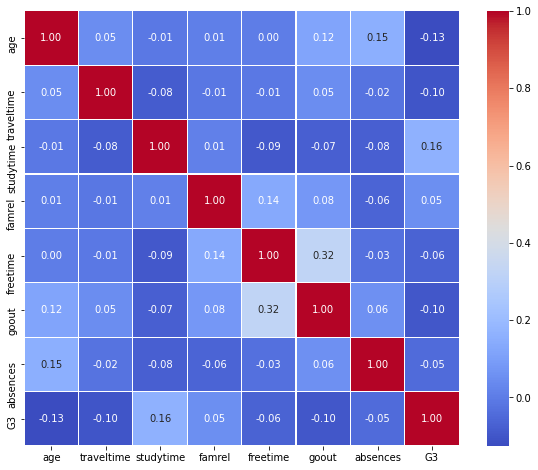

In [ ]:
plt.figure(figsize = [10,8])
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);


Observando as analises acima, verificamos que não há uma correlação muito forte entre os dados.

# 4.   Preparação dos Dados



#### Função para divisão do dataset em treino e teste

In [ ]:
#importando a função
from sklearn.model_selection import train_test_split

#escolhemos 25% dos dados para teste
def divisao(df, train_size = 0.25):
  df_train, df_test = train_test_split(df, test_size = 0.25, random_state = 1)
  return df_train, df_test

In [ ]:
df_train, df_test = divisao(df)

As dimensões dos dataframes df_train e df_test

In [ ]:
df_train.shape, df_test.shape

((783, 17), (261, 17))

Vamos trabalhar com duas etapas do processamento de modelagem:

1.   Tratamento de variáveis categóricas
2.   Normalização dos dados



Tratamento de variáveis categóricas

In [ ]:
#importando a função
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

In [ ]:
variaveis_para_tratamento_categoricas =['sex', 'famsize', 'Pstatus',
                                        'schoolsup', 'famsup',
                                        'paid', 'activities',
                                        'internet', 'romantic']

In [ ]:
df_variaveis_para_tratamento_categoricas_OHE = cat_encoder.fit_transform(df[variaveis_para_tratamento_categoricas]).toarray()

In [ ]:
df_variaveis_para_tratamento_categoricas_OHE

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [ ]:
cat_encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['GT3', 'LE3'], dtype=object),
 array(['A', 'T'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

 Normalização dos dados

In [ ]:
#importando a função
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [ ]:
variaveis_para_normalizar = ['age', 'traveltime', 'studytime',
                             'famrel', 'freetime', 'goout',
                             'absences', 'G3']

In [ ]:
sc.fit_transform(df[variaveis_para_normalizar])

array([[ 1.02788947,  0.65221024,  0.03560569, ...,  0.73251148,
         0.2521546 , -1.38287106],
       [ 0.22103488, -0.71507388,  0.03560569, ..., -0.1355271 ,
        -0.07006009, -1.38287106],
       [-1.3926743 , -0.71507388,  0.03560569, ..., -1.00356568,
         0.89658397, -0.34739149],
       ...,
       [ 1.02788947,  0.65221024,  0.03560569, ..., -1.87160426,
         0.2521546 , -0.60626138],
       [ 0.22103488,  0.65221024, -1.16350193, ...,  1.60055006,
         0.2521546 , -0.34739149],
       [ 1.02788947,  2.01949437, -1.16350193, ..., -1.87160426,
        -0.07006009, -0.0885216 ]])

In [ ]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None ):

   dff = df.copy()

   variaveis_para_tratamento_categoricas =['sex', 'famsize', 'Pstatus',
                                           'schoolsup', 'famsup',
                                           'paid', 'activities',
                                           'internet', 'romantic']

   variaveis_para_normalizar = ['age', 'traveltime','studytime', 'famrel', 'freetime', 'goout','absences', 'G3']

   if dataset_de_treino:
    

      #OHE
      encoder = OneHotEncoder()
      df_variaveis_para_tratamento_categoricas_OHE = encoder.fit_transform(dff[variaveis_para_tratamento_categoricas]).toarray()

      #normalização
      sc = StandardScaler()
      variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar])

      X, y = np.c_[df_variaveis_para_tratamento_categoricas_OHE, variaveis_norm], dff.G3.values
      return X, y, encoder, sc   

   else:

      #OHE
      df_variaveis_para_tratamento_categoricas_OHE = cat_encoder.transform(dff[variaveis_para_tratamento_categoricas]).toarray()

      #normalização
      variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar])

      X, y = np.c_[df_variaveis_para_tratamento_categoricas_OHE, variaveis_norm], dff.G3.values
      return X, y



In [ ]:
Xtrain, ytrain, encoder_train, scaler_train = preprocessamento_completo(df = df_train,
                                                                        dataset_de_treino = True,
                                                                        cat_encoder = None,
                                                                        std_scaler = None)

In [ ]:
Xtrain.shape, ytrain.shape, df_train.shape 

((783, 26), (783,), (783, 17))

Veja que a dimensão de Xtrain e df_train estão diferentes!

De fato, foi aplicado one-hot-encoding, o que aumenta a dimensão do dataset.

Abaixo, iremos aplicar as transformações no dataset de teste - dataset que iremos usar apenas no final do notebook, após a escolha do modelo de aprendizado de máquina final.

In [ ]:
Xtest, ytest = preprocessamento_completo(df = df_test,
                                         dataset_de_treino = False,
                                         cat_encoder = encoder_train,
                                         std_scaler = scaler_train)

In [ ]:
Xtest.shape, ytest.shape, df_test.shape

((261, 26), (261,), (261, 17))

# 5 Construção do Modelo e Avaliação
Nesta etapa, estaremos testando vários modelos.

Vamos importar os algoritmos que iremos usar, bem como constuir as métricas de performance.

In [ ]:
#algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#metricas de performance
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def RMSE(ytrue, ypred):
  return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

Vamos começar por treinar o modelo de regressão linear nos dados e avaliar o RMSE e o R2 nos dados de treino:

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

4.666669037664613e-15

In [ ]:
r2_score(y_true = ytrain, y_pred = lin_reg.predict(Xtrain))

1.0

Agora, vamos testar algumas versões do KNN, considerando diferentes números de vizinhos.

In [ ]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)

    preds = knn.predict(Xtrain)

    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)

    print('K = ' + str(n) + ' | RMSE:' + str(np.round(rmse_train,2)) + ' / R2: '+ str(np.round(r2_train, 2)))

K = 1 | RMSE:0.0 / R2: 1.0
K = 2 | RMSE:1.33 / R2: 0.88
K = 5 | RMSE:1.42 / R2: 0.87
K = 10 | RMSE:1.57 / R2: 0.84
K = 20 | RMSE:1.78 / R2: 0.79
K = 50 | RMSE:2.17 / R2: 0.69


In [ ]:
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)

    preds = dt.predict(Xtrain)

    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)

    print('Profundidade da árvore = ' + str(m) + ' | RMSE:' + str(np.round(rmse_train,2)) + ' / R2: '+ str(np.round(r2_train, 2)))    

Profundidade da árvore = 1 | RMSE:2.62 / R2: 0.54
Profundidade da árvore = 5 | RMSE:0.0 / R2: 1.0
Profundidade da árvore = 10 | RMSE:0.0 / R2: 1.0
Profundidade da árvore = 100 | RMSE:0.0 / R2: 1.0


Vemos que os modelos KNN(K=1) e os DecTrees(max_depth = 5, 10 e 100) ambos tiveram um R2 de 1.0 (melhor R2 possível) e um RMSE de 0 (menor RMSE possível)

<br>

Abaixo, vamos verificar se esses modelos estão sofrendo de overfitting. 

# Validação cruzada

In [ ]:
#importando a função
from sklearn.model_selection import cross_val_score

Aplicaremos a validação cruzada para a regressão linear em nosso problema, consideramos 5 folds e o R2 como métrica de performance a ser medida.

In [ ]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(),
                             X = Xtrain,
                             y = ytrain,
                             cv = 5,
                             scoring = 'r2')
print(cv_lin_reg)
print('media:', cv_lin_reg.mean())
print('desvio padrão:', cv_lin_reg.std())

[1. 1. 1. 1. 1.]
media: 1.0
desvio padrão: 0.0


Abaixo, vamos criar um pipeline para facilitar nossas análises dos modelos


In [ ]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo,
                                 X = Xtrain,
                                 y = ytrain,
                                 cv = num_folds,
                                 scoring = 'r2')
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true = ytrain, y_pred = modelo.predict(Xtrain))
    plt.figure(figsize = [8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')

    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--', c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4, 1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel('R2_Score', fontsize = 14, fontweight = 'bold')
    plt.xlabel('Folds', fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + ' | R2 TREINO/VAL: '+ str(np.round(r2_train,2)) +' / '+ str(np.round(cv_results.mean(),2)),
            fontsize = 14, fontweight = 'bold');


Aplicando a função acima nos modelos que estamos considerando:

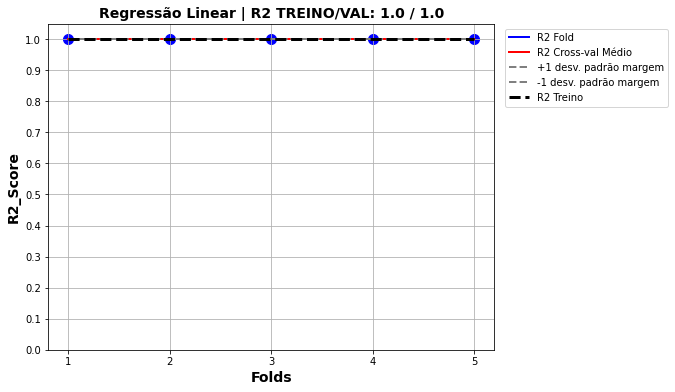

In [ ]:
cross_validation_R2_results(modelo = LinearRegression(),
                            nome_modelo = 'Regressão Linear',
                            X = Xtrain,
                            y = ytrain,
                            num_folds = 5)

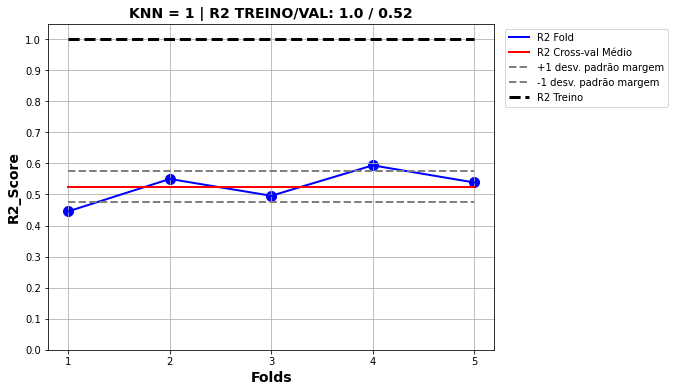

In [ ]:
cross_validation_R2_results(modelo  = KNeighborsRegressor(n_neighbors = 1),
                            nome_modelo = 'KNN = 1',
                            X = Xtrain,
                            y = ytrain,
                            num_folds = 5)

Olhando o resultado acima, vemos que esse modelo está overfitando nós dados de treino e o desvio padrão está variando um pouco nos dados de treino comparado aos dados de validação.

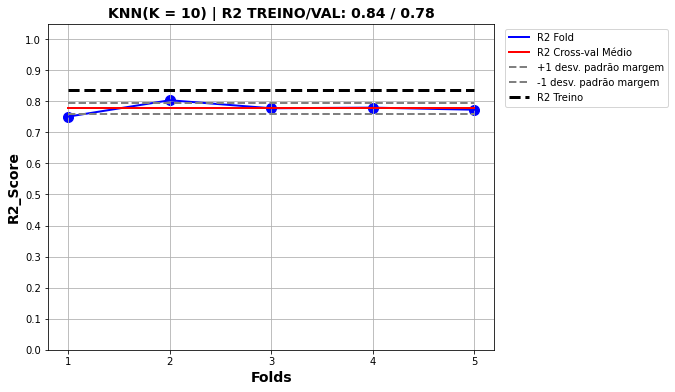

In [ ]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                            nome_modelo = 'KNN(K = 10)',
                            X = Xtrain,
                            y = ytrain,
                            num_folds = 5)

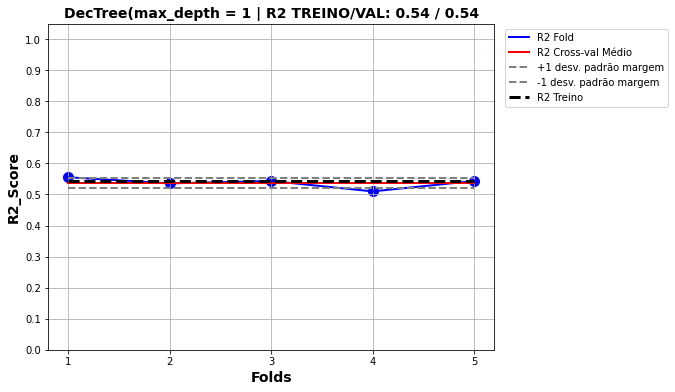

In [ ]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                            nome_modelo = 'DecTree(max_depth = 1',
                            X = Xtrain,
                            y = ytrain,
                            num_folds = 5)

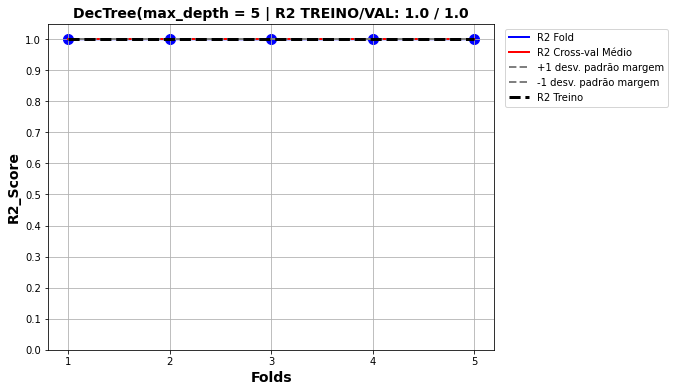

In [ ]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                            nome_modelo = 'DecTree(max_depth = 5',
                            X = Xtrain,
                            y = ytrain,
                            num_folds = 5)

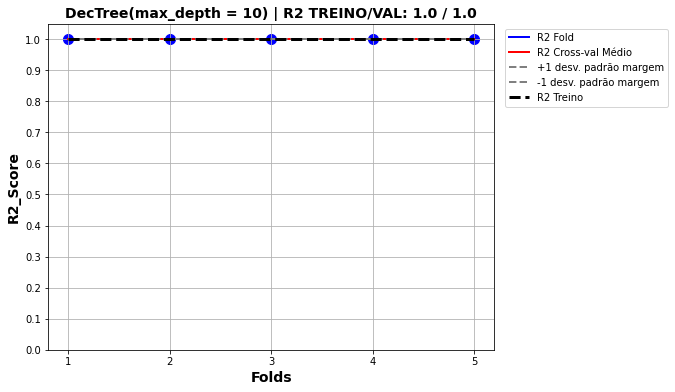

In [ ]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                            nome_modelo = 'DecTree(max_depth = 10)',
                            X = Xtrain,
                            y = ytrain,
                            num_folds = 5)

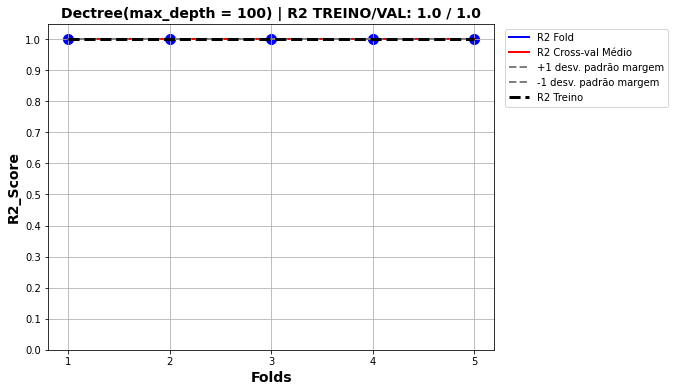

In [ ]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                            nome_modelo = 'Dectree(max_depth = 100)',
                            X = Xtrain,
                            y = ytrain,
                            num_folds = 5)

Diante dos resultados acima, vemos que só o resultado do KNN com K = 1 vizinho está sofrendo de overfitting. E as demais instâncias do KNN, regressão linear e das árvores de decisão obteve uma performance OK! 

Eu vou considerar que nosso modelo final é a Dectree(max_depth = 100).  


 Nesta etapa final, vamos treina-lá novamente, usando todo o conjunto de treino e finalmente iremos avaliar as métricas (R2) no conjunto de teste:

In [ ]:
modelo_final = DecisionTreeRegressor(max_depth = 100)
modelo_final.fit(Xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
preds_modelo_final = modelo_final.predict(Xtest)

In [ ]:
#R2 em teste

r2_score(y_true = ytest, y_pred = preds_modelo_final)

0.9992198289004072

Vemos que o R2 em teste ficou similar ao que estávamos encontrando nos dados de treinamento e validação. Desta forma, boas indicações de que o Dectree(max_depth = 100) realmente está generalizando bem o dataset.

Para finalizar as análises, vamos olhar a dispersão da __nota média final real__ no dataset de teste comparado com a  __nota média final predita__ pelo modelo; vamos também calcular o RMSE para quantificar, em média, qual o tamanho do erro dessas notas: 

In [ ]:
rmse_teste_final = RMSE(ytrue = ytest, ypred = preds_modelo_final) 
rmse_teste_final

0.10721125348377948

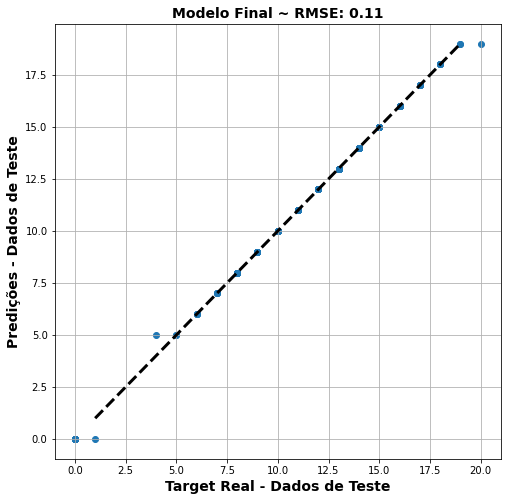

In [ ]:
plt.figure(figsize = [8,8])
plt.title('Modelo Final ~ RMSE: ' + str(np.round(rmse_teste_final,2)), fontsize =  14, fontweight = 'bold')
plt.scatter(ytest, preds_modelo_final)
plt.xlabel('Target Real - Dados de Teste', fontsize = 14, fontweight = 'bold')
plt.ylabel('Predições - Dados de Teste', fontsize = 14, fontweight = 'bold')
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--', c = 'black', lw = 3);

Avaliação final:
<br>
Nosso modelo parece ser bom! Indicando que os valores reais do target estão sendo preditos. 